# Regression using Python

In [2]:
import json
import os
from kaggle.api.kaggle_api_extended import KaggleApi
import seaborn as sns
import statsmodels as sm

# load the json file containing your username and key - create a free account on Kaggle to get your own key!
with open('chetan_kaggle.json', 'r') as f:
    config_data = json.load(f)
    
# Set the appropriate env. variables
os.environ['KAGGLE_USERNAME'] = config_data['username']
os.environ['KAGGLE_KEY'] = config_data['key']

# Initialize the API
api = KaggleApi()
api.authenticate()

# Search for datasets with the term "advert"
search_term = "advert"
datasets = api.dataset_list(search=search_term)

# Check if datasets were found
if datasets:
    print(f"Datasets found for search term '{search_term}':")
    
    # Loop through the list and print dataset details
    for dataset in datasets:
        print(f"Title: {dataset.title}")
        print(f"Reference: {dataset.ref}")
        print(f"Dataset URL: https://www.kaggle.com/{dataset.ref}")
        print(f"Description: {dataset.subtitle}")
        print(f"-------------------------------------")
else:
    print(f"No datasets found for search term '{search_term}'.")


# Download data from Kaggle
# Define the Kaggle dataset path
dataset = "yasserh/advertising-sales-dataset"

# Download the data to the current path - indicated by the -p .
os.system(f"kaggle datasets download -d {dataset} -p . --unzip")

Datasets found for search term 'advert':
Title: Advertising Sales Dataset
Reference: yasserh/advertising-sales-dataset
Dataset URL: https://www.kaggle.com/yasserh/advertising-sales-dataset
Description: Advertising Budget & Sales Prediction using Rregression
-------------------------------------
Title: Advertising dataset
Reference: tawfikelmetwally/advertising-dataset
Dataset URL: https://www.kaggle.com/tawfikelmetwally/advertising-dataset
Description: sales prediction using linear regression
-------------------------------------
Title: Car Sale Advertisements
Reference: antfarol/car-sale-advertisements
Dataset URL: https://www.kaggle.com/antfarol/car-sale-advertisements
Description: Data collected from private car sale advertisements in Ukraine
-------------------------------------
Title: Product Advertising Data
Reference: singhnavjot2062001/product-advertising-data
Dataset URL: https://www.kaggle.com/singhnavjot2062001/product-advertising-data
Description: Advertising Costs and Sale

0

In [3]:
import pandas as pd

# Load the Adveritising.csv dataset
df = pd.read_csv("Advertising Budget and Sales.csv", header=0)
print(df.head())

# the dataframe needs to be cleaned up -- rename the "Unnamed: 0" column to recordid and set it as the index
df.rename(columns={'Unnamed: 0': 'recordid'}, inplace=True)

# The index needs to be reset to column 0
#df.set_index("recordid", inplace = True)
print(df.head())

   Unnamed: 0  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0           1             230.1                 37.8                     69.2   
1           2              44.5                 39.3                     45.1   
2           3              17.2                 45.9                     69.3   
3           4             151.5                 41.3                     58.5   
4           5             180.8                 10.8                     58.4   

   Sales ($)  
0       22.1  
1       10.4  
2        9.3  
3       18.5  
4       12.9  
   recordid  TV Ad Budget ($)  Radio Ad Budget ($)  Newspaper Ad Budget ($)  \
0         1             230.1                 37.8                     69.2   
1         2              44.5                 39.3                     45.1   
2         3              17.2                 45.9                     69.3   
3         4             151.5                 41.3                     58.5   
4         5             180.

In [4]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

# examine the shape of the data
df.shape



(200, 5)

In [5]:
# examine the dataset itself
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   recordid                 200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Get some basic descriptive statistics to understand the dataset
# note: The sales are in thousands of units and the budget is in thousands of dollars.

df.describe()


,recordid,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


   recordid     TV  Radio  Newspaper  Sales
0         1  230.1   37.8       69.2   22.1
1         2   44.5   39.3       45.1   10.4
2         3   17.2   45.9       69.3    9.3
3         4  151.5   41.3       58.5   18.5
4         5  180.8   10.8       58.4   12.9


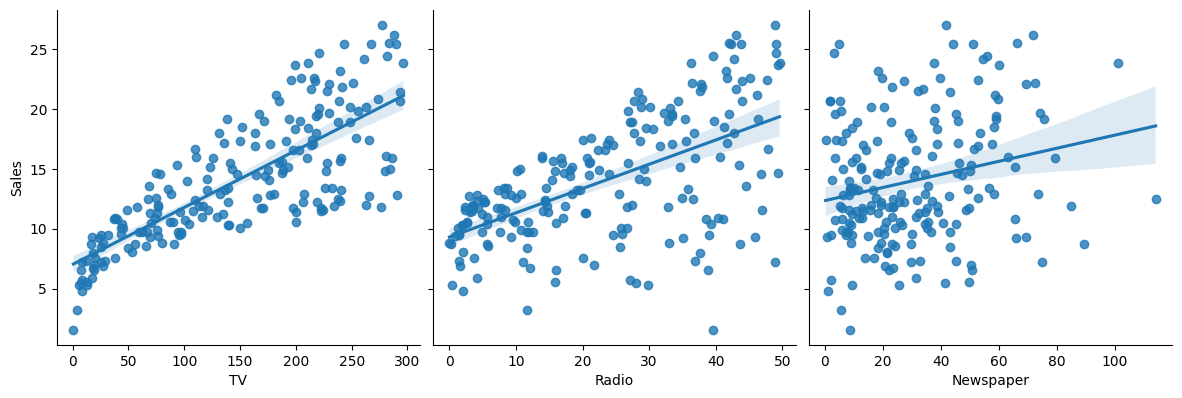

In [7]:
# Rename columns for easier coding
df.rename(columns={'TV Ad Budget ($)': 'TV', 'Radio Ad Budget ($)': 'Radio', 'Newspaper Ad Budget ($)': 'Newspaper', 'Sales ($)': 'Sales'}, inplace=True)
print(df.head())
# Examine linearity
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.show()


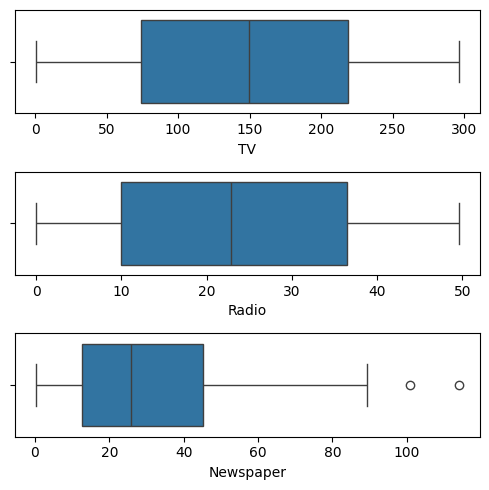

In [8]:
# Examine the distributions of each independent variable
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0], orient='h')
plt2 = sns.boxplot(df['Radio'], ax = axs[1], orient='h')
plt3 = sns.boxplot(df['Newspaper'], ax = axs[2], orient='h')
plt.tight_layout()

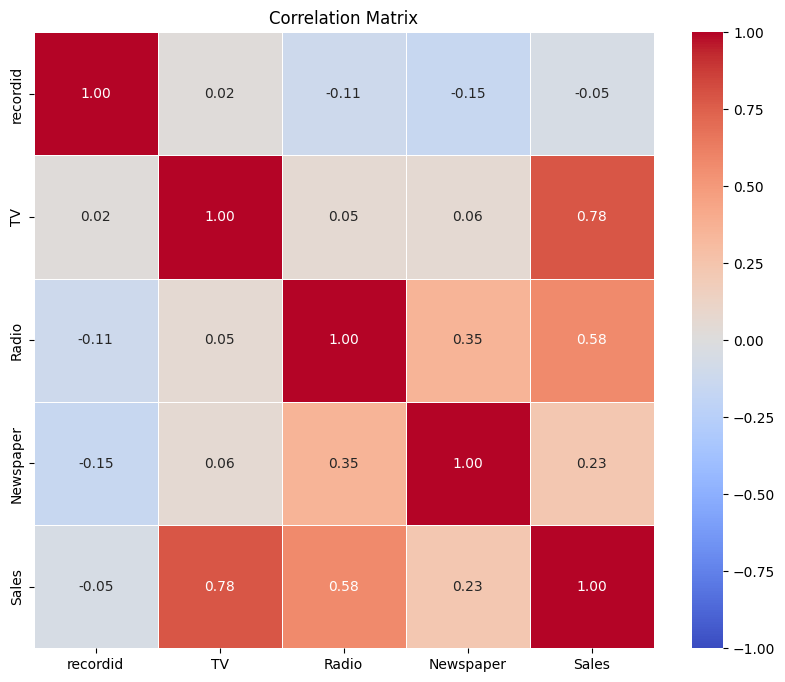

In [9]:
# Might as well check correlations while we are at it!

# Compute the correlation matrix
corr = df.corr()


# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<Axes: xlabel='TV', ylabel='Sales'>

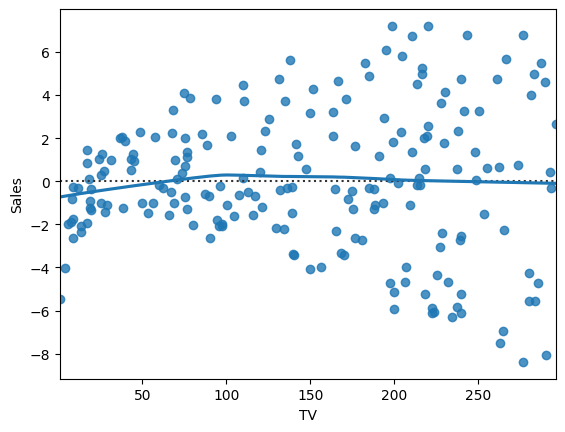

In [10]:
import statsmodels.api as sm

# Check for heteroscedasticity 
# This function will regress y on x and then draw a scatterplot of the residuals.

sns.residplot(x = df['TV'], y = df["Sales"], lowess = True)



<Axes: xlabel='TV', ylabel='Log_Sales'>

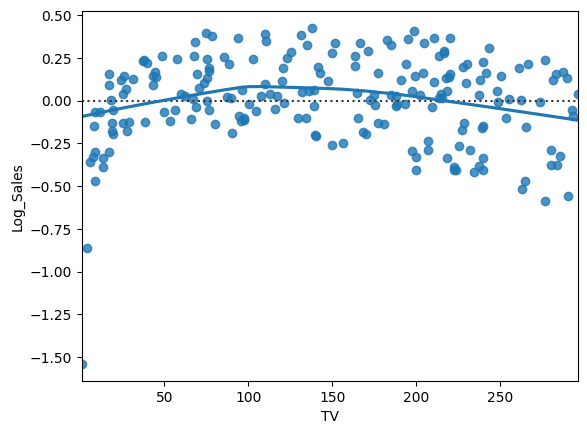

In [11]:

# Log transform the dependent variable
df['Log_Sales'] = np.log(df['Sales'])

# replot
sns.residplot(x = df['TV'], y = df["Log_Sales"], lowess = True)

In [12]:
# Durban Watson test -- have to run the regression first!

import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

# Assuming 'X' and 'y' are your independent and dependent variables, respectively
# Add a constant to X to include an intercept in the model
X = sm.add_constant(df['TV'])
y = df['Sales']

# Fit the regression model
model = sm.OLS(y, X).fit()

# Obtain the residuals
residuals = model.resid

# Compute the Durbin-Watson statistic
dw_stat = durbin_watson(residuals)

print("Durbin-Watson statistic:", dw_stat)

Durbin-Watson statistic: 1.93468853728236


In [13]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [14]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.47e-42
Time:                        20:53:09   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

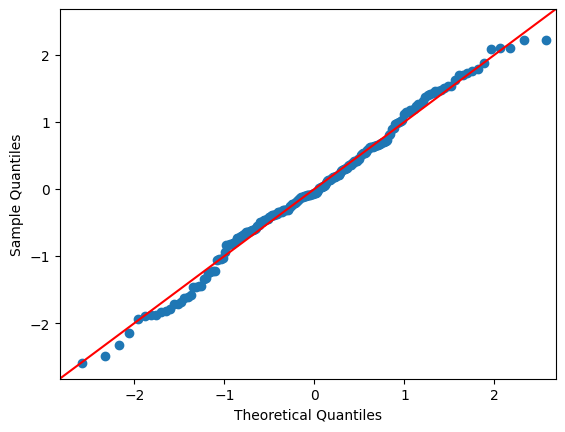

In [15]:
# Check normality of errors
ax = sm.qqplot(residuals, fit = True, line = "45")


In [16]:
# print the confidence intervals for the model coefficients
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [17]:
# print p-values
model.pvalues

const    1.406300e-35
TV       1.467390e-42
dtype: float64

In [18]:
import statsmodels.formula.api as smf

# multiple regression
model_mlr = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=df).fit()

# Obtain the residuals
residuals_mlr = model_mlr.resid

In [19]:
# Results of the MLR model
print(model_mlr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.58e-96
Time:                        20:53:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

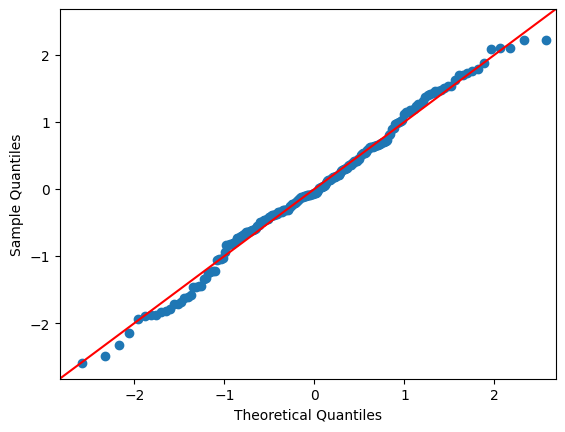

In [20]:
# Check normality of errors
ax = sm.qqplot(residuals, fit = True, line = "45")